<a href="https://colab.research.google.com/github/nishatfarzana86/Machine-Learning/blob/main/Nishat's_First_ML_Project_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Data

In [3]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2021-03-07 10:56:52--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801501.us.archive.org/8/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-03-07 10:56:52--  https://ia801501.us.archive.org/8/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801501.us.archive.org (ia801501.us.archive.org)... 207.241.228.151
Connecting to ia801501.us.archive.org (ia801501.us.archive.org)|207.241.228.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-03-07 10:56:53 (349 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [5]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd14282ac50>,
      dtype=object)

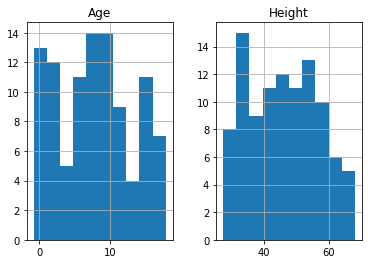

In [6]:
raw_data.hist()

Visualize the Data


In [7]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


Build the Model and Train it

Use the Model - Make some Predictions on UNSEEN Data
